라이브러리 버전  
판다스 : 1.3.4

In [1]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4

In [2]:
# 버전 확인용
import pandas as pd

print("판다스 버전 :", pd.__version__)

판다스 버전 : 1.3.4


필요한 라이브러리 불러오기

In [3]:
import pandas as pd
import os
import re
from ast import literal_eval

#시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\it\AppData\Local\Temp\ipykernel_19532\803475683.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
basic_info_path = './data/makeup_basic_info/'
basic_info_files = os.listdir(basic_info_path)

In [5]:
print("제품 기본 정보 데이터 수 :", len(basic_info_files))

제품 기본 정보 데이터 수 : 976


In [6]:
pattern = re.compile(r'^\d+_info\.xlsx$')
basic_info_files = [file for file in os.listdir(basic_info_path) if pattern.match(file)]
df_bsc_inf_tmp = [pd.read_excel(basic_info_path + file) for file in basic_info_files]

df_bsc = pd.concat(df_bsc_inf_tmp)
df_bsc.reset_index(drop=True, inplace=True)

df_bsc.head(2)

,name,tag,likes,num_review,num_photo,url,sale_day
0,0번_제품,"['#촉촉한수분감', '#촉촉한사용감', '#윤기커버', '#부드러운사용감', '#...","찜4,203",50,(20건),https://cr.shopping.naver.com/adcr.nhn?x=hgdmo...,등록일 2022.01.
1,100번_제품,"['#보송보송한메이크업', '#부드러운피부', '#인생템', '#헤라블랙쿠션', '...",찜62,1,(1건),https://cr.shopping.naver.com/adcr.nhn?x=DToeQ...,등록일 2022.05.


제품 기본 정보 데이터 전처리

In [7]:
df_bsc.to_excel(basic_info_path + 'basic_info.xlsx', index=False) # 저장하기

In [8]:
df_bsc = pd.read_excel(basic_info_path + 'basic_info.xlsx')

In [9]:
df_bsc.rename(columns={"name":"제품기호",
                       "sale_day":"dates",
                       "tag":"HashTag"}, inplace=True)

In [10]:
def get_digit_only(text):
    """숫자만 추출한다"""
    if text !='없음':
        tmp = re.compile('[0-9]+').findall(str(text)) #①
        result = ''.join(tmp) #②

        return int(result)
    else:
        return 0

In [11]:
print("찜한 수 전처리 결과 예시 :", get_digit_only(text='찜4,203'))
print("리뷰 수 전처리 결과 예시:", get_digit_only(text='1,221'))
print("사진 리뷰 수 전처리 결과 예시:", get_digit_only(text='(173건)'))

찜한 수 전처리 결과 예시 : 4203
리뷰 수 전처리 결과 예시: 1221
사진 리뷰 수 전처리 결과 예시: 173


In [12]:
df_bsc['likes'] = df_bsc['likes'].astype('str')
df_bsc['num_review'] = df_bsc['num_review'].astype('str')
df_bsc['num_photo'] = df_bsc['num_photo'].astype('str')

In [13]:
df_bsc['likes'] = df_bsc['likes'].apply(lambda x:get_digit_only(x))
df_bsc['num_review'] = df_bsc['num_review'].apply(lambda x:get_digit_only(x))
df_bsc['num_photo'] = df_bsc['num_photo'].apply(lambda x:get_digit_only(x))

In [14]:
df_bsc['dates'] = df_bsc['dates'].apply(lambda x:x.replace('등록일 ', ''))

In [15]:
df_bsc.head(2)

,제품기호,HashTag,likes,num_review,num_photo,url,dates
0,0번_제품,"['#촉촉한수분감', '#촉촉한사용감', '#윤기커버', '#부드러운사용감', '#...",4203,50,20,https://cr.shopping.naver.com/adcr.nhn?x=hgdmo...,2022.01.
1,100번_제품,"['#보송보송한메이크업', '#부드러운피부', '#인생템', '#헤라블랙쿠션', '...",62,1,1,https://cr.shopping.naver.com/adcr.nhn?x=DToeQ...,2022.05.


In [16]:
df_bsc['year'] = df_bsc['dates'].apply(lambda x:x[:4])
df_bsc['month'] = df_bsc['dates'].apply(lambda x:x[-3:].replace('.',''))

In [17]:
df_bsc.head(2)

,제품기호,HashTag,likes,num_review,num_photo,url,dates,year,month
0,0번_제품,"['#촉촉한수분감', '#촉촉한사용감', '#윤기커버', '#부드러운사용감', '#...",4203,50,20,https://cr.shopping.naver.com/adcr.nhn?x=hgdmo...,2022.01.,2022,01
1,100번_제품,"['#보송보송한메이크업', '#부드러운피부', '#인생템', '#헤라블랙쿠션', '...",62,1,1,https://cr.shopping.naver.com/adcr.nhn?x=DToeQ...,2022.05.,2022,05


In [18]:
df_bsc['year'].value_counts().sort_index()

2017     11
2018     13
2019     41
2020    171
2021    405
2022    333
Name: year, dtype: int64

In [19]:
df_bsc['month'].value_counts().sort_index()

01     42
02     80
03     94
04    129
05     99
06    112
07     88
08     79
09     60
10     66
11     61
12     64
Name: month, dtype: int64

In [20]:
x = df_bsc['month'].value_counts().sort_index().index
y = df_bsc['month'].value_counts().sort_index().values

Text(0, 0.5, '등록수')

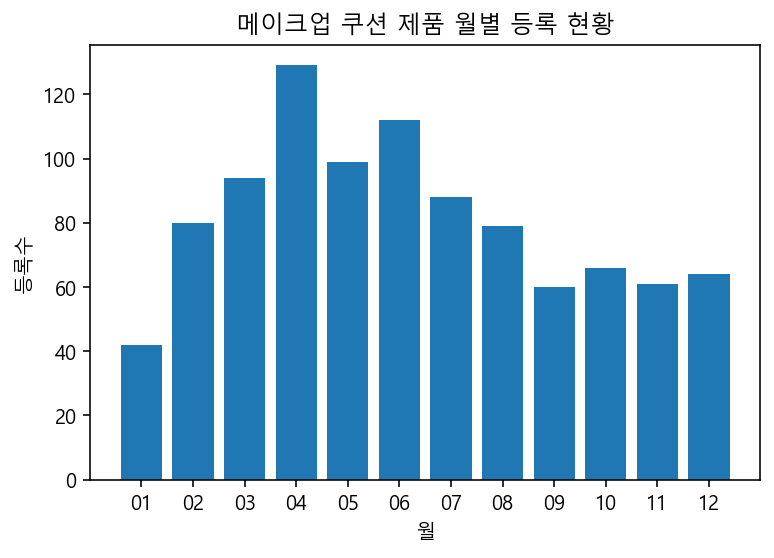

In [21]:
plt.title('메이크업 쿠션 제품 월별 등록 현황')
plt.bar(x, y)
plt.xlabel('월')
plt.ylabel('등록수')

해시태그 전처리

In [22]:
df_bsc.head(2)

,제품기호,HashTag,likes,num_review,num_photo,url,dates,year,month
0,0번_제품,"['#촉촉한수분감', '#촉촉한사용감', '#윤기커버', '#부드러운사용감', '#...",4203,50,20,https://cr.shopping.naver.com/adcr.nhn?x=hgdmo...,2022.01.,2022,01
1,100번_제품,"['#보송보송한메이크업', '#부드러운피부', '#인생템', '#헤라블랙쿠션', '...",62,1,1,https://cr.shopping.naver.com/adcr.nhn?x=DToeQ...,2022.05.,2022,05


In [23]:
df_bsc['HashTag'][0]

"['#촉촉한수분감', '#촉촉한사용감', '#윤기커버', '#부드러운사용감', '#생기있는', '#윤기나는얼굴', '#지속력좋은파운데이션', '#30대여성', '#20대여성']"

In [24]:
type(df_bsc['HashTag'][0])

str

In [25]:
tags = literal_eval(df_bsc['HashTag'][0])
tags

['#촉촉한수분감',
 '#촉촉한사용감',
 '#윤기커버',
 '#부드러운사용감',
 '#생기있는',
 '#윤기나는얼굴',
 '#지속력좋은파운데이션',
 '#30대여성',
 '#20대여성']

In [26]:
df_bsc_tmp = []
for i in range(df_bsc.shape[0]):
    tags = literal_eval(df_bsc['HashTag'][i])
    df_tmp = pd.DataFrame({"제품기호":df_bsc['제품기호'][i],
                           "dates":df_bsc['dates'][i],
                           "HashTag":tags,
                           "likes":df_bsc['likes'][i],
                           "num_review":df_bsc['num_review'][i],
                           "num_photo":df_bsc['num_photo'][i],
                           "year":df_bsc['year'][i],
                           "month":df_bsc['month'][i]
                           })
    df_bsc_tmp.append(df_tmp)

df_bsc_rslt = pd.concat(df_bsc_tmp)

In [27]:
df_bsc_rslt.head(3)

,제품기호,dates,HashTag,likes,num_review,num_photo,year,month
0,0번_제품,2022.01.,#촉촉한수분감,4203,50,20,2022,01
1,0번_제품,2022.01.,#촉촉한사용감,4203,50,20,2022,01
2,0번_제품,2022.01.,#윤기커버,4203,50,20,2022,01


In [28]:
df_bsc_rslt.to_excel(basic_info_path + 'basic_info_result.xlsx')